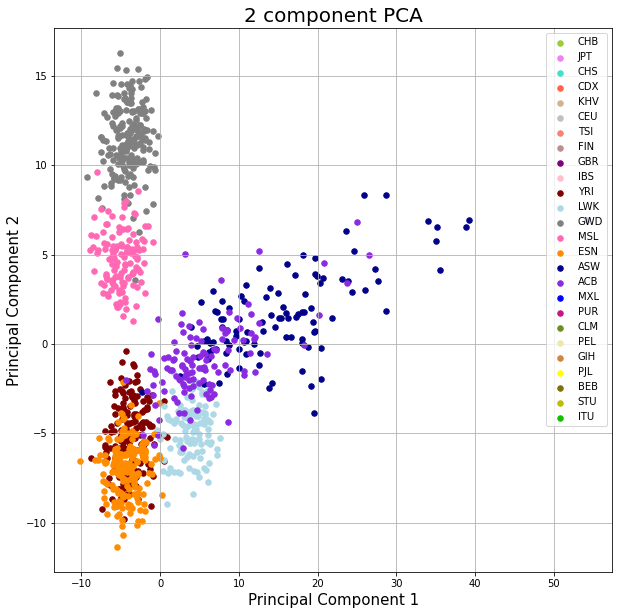

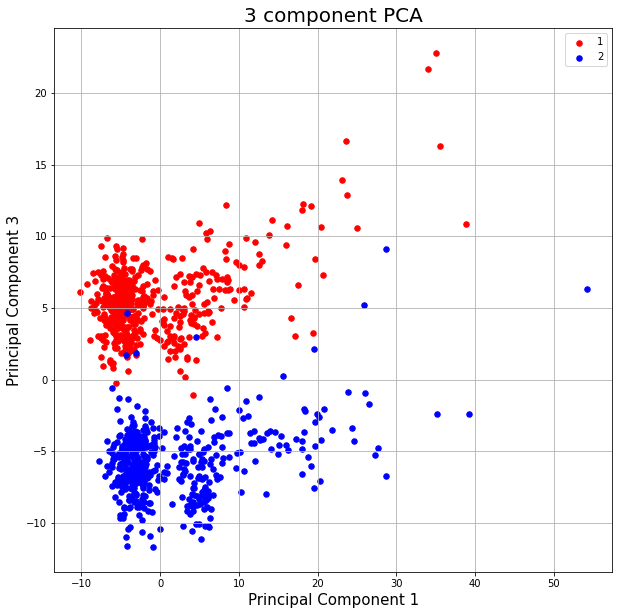

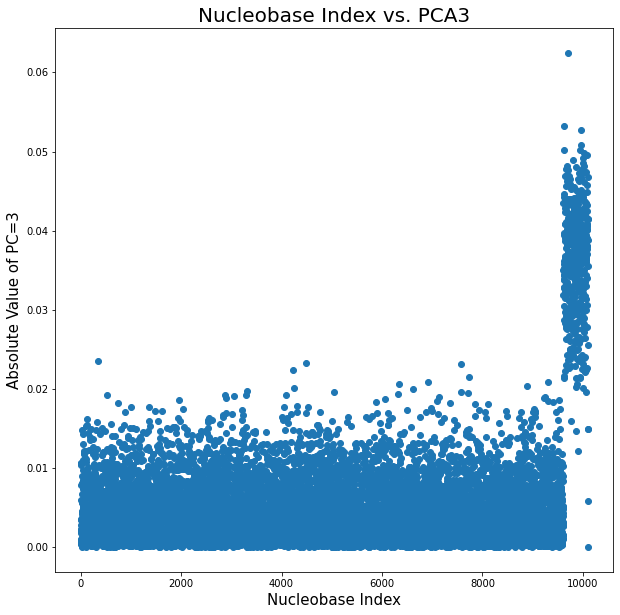

In [38]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

filename = "/content/drive/MyDrive/Machine Learning/p1dataset2021.txt"

df = pd.read_csv(filename, sep=" ", header=None)

arr = np.array(df)
#this is the array without the first 3 cols
arr = arr[:,3:]

#for plotting
pops = ['CHB', 'JPT', 'CHS', 'CDX', 'KHV', 'CEU', 'TSI', 'FIN', 'GBR', 'IBS', 'YRI', 'LWK', 'GWD', 'MSL', 'ESN', 'ASW', 'ACB', 'MXL', 'PUR', 'CLM', 'PEL', 'GIH', 'PJL', 'BEB', 'STU', 'ITU']
pop_colors = ['#9ACD32', '#EE82EE', '#40E0D0', '#FF6347', '#D2B48C', '#C0C0C0', '#FA8072', '#BC8F8F', '#800080', '#FFC0CB', '#800000', '#ADD8E6', '#808080', '#FF69B4', '#FF8C00', '#00008B', '#8A2BE2', '#0000FF',  '#C71585', '#6B8E23', '#EEE8AA', '#CD853F', '#FFFF00', "#7f700f", "#bcbd00", "#17be00"]
sexes = [1,2]
sex_colors = ['r', 'b']
index = ['#9ACD32', '#EE82EE', '#40E0D0', '#FF6347']

#get modes to compare for binary matrix
modes = np.array(df.mode())
modes = modes[0,3:]

bin_arr = np.zeros((len(arr), len(arr[0])))

for i in range(0, len(arr)):
  for j in range(0, len(arr[0])):
    if arr[i, j] == modes[j]:
      bin_arr[i,j] = 0
    else:
      bin_arr[i,j] = 1
#standardize the matrix
bin_arr = StandardScaler().fit_transform(bin_arr)

#perform PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(bin_arr)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])


# pca n = 2 (part b)
pop = pd.Series(df[2], name='populations')
popDf = pd.concat([principalDf, pop], axis=1)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

for target, color in zip(pops, pop_colors):
    indicesToKeep = df[2] == target
    ax.scatter(popDf.loc[indicesToKeep, 'PC1'], 
               popDf.loc[indicesToKeep, 'PC2'], 
               c = color, 
               s = 30)
ax.legend(pops)
ax.grid()
plt.show()

# pca n = 3 (part d)
sex = pd.Series(df[1], name='sex')
sexDf = pd.concat([principalDf, sex], axis=1)

fig2 = plt.figure(figsize = (10,10))
ax2 = fig2.add_subplot(1, 1, 1)
ax2.set_xlabel('Principal Component 1', fontsize = 15)
ax2.set_ylabel('Principal Component 3', fontsize = 15)
ax2.set_title('3 component PCA', fontsize = 20)

for target, color in zip(sexes, sex_colors):
    indicesToKeep = df[1] == target
    ax2.scatter(sexDf.loc[indicesToKeep, 'PC1'], 
               sexDf.loc[indicesToKeep, 'PC3'], 
               c = color, 
               s = 30)
ax2.legend(sexes)
ax2.grid()
plt.show()

# part f — nucleobase index vs absolute value of the third pc.

fig3 = plt.figure(figsize = (10,10))
ax3 = fig3.add_subplot(1, 1, 1)
ax3.set_xlabel('Nucleobase Index', fontsize = 15)
ax3.set_ylabel('Absolute Value of PC=3', fontsize = 15)
ax3.set_title('Nucleobase Index vs. PCA3', fontsize = 20)

y = abs(pca.components_[2, :])
x = np.linspace(1, 10101, 10101)

ax3.scatter(x, y)


